<a href="https://colab.research.google.com/github/sakasa/notebooks/blob/master/seaborn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://seaborn.pydata.org/index.html
- https://note.com/hiro10_yme38/n/nd2fa525942f3#DbQOL

In [27]:
!pip install -U pip


In [28]:
!pip install -U numpy


In [29]:
!pip install -U scipy


In [30]:
!pip install -U pandas


In [31]:
!pip install -U matplotlib


In [32]:
!pip install -U seaborn

In [33]:
import seaborn as sns
sns.__version__

'0.11.1'

In [35]:
import numpy as np
np.__version__

'1.19.5'

In [36]:
import pandas as pd
pd.__version__

'1.1.5'

In [40]:
!pip uninstall -y matplotlib

Found existing installation: matplotlib 3.3.4
Uninstalling matplotlib-3.3.4:
  Successfully uninstalled matplotlib-3.3.4


In [49]:
!pip install matplotlib==3.0.2

     |████████████████████████████████| 12.9 MB 46 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [50]:
import matplotlib
matplotlib.__version__

'3.2.2'

In [52]:
import matplotlib.pyplot as plt

In [53]:
import requests
# import json
import matplotlib.dates as mdates
from matplotlib import ticker
import datetime
import time
# import re
# from pytz import timezone
from tqdm.notebook import tqdm

%matplotlib inline

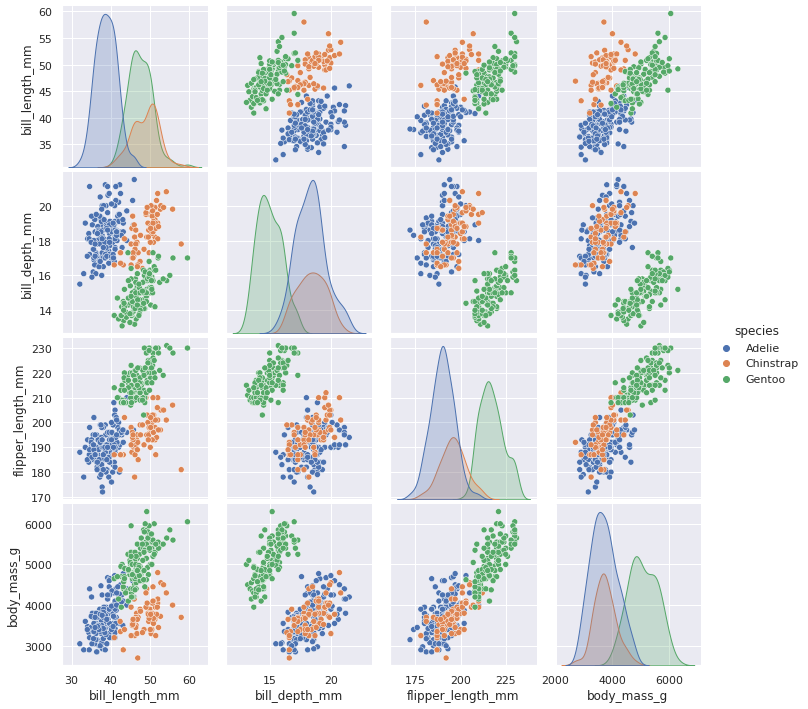

In [54]:
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

In [55]:
url = 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json'

In [56]:
response = requests.get(url)
response

<Response [200]>

In [57]:
response.headers

{'Connection': 'keep-alive', 'Content-Length': '22745', 'Cache-Control': 'max-age=300', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'Content-Type': 'text/plain; charset=utf-8', 'ETag': 'W/"f5e4f325c82fcebbc8037eae1a856f41ff346e1eee22fc3a0ab6b142ab41e7c5"', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'X-GitHub-Request-Id': 'FB24:02F8:348FC6:43B312:603F8328', 'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Date': 'Wed, 03 Mar 2021 13:05:01 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-wdc5578-WDC', 'X-Cache': 'HIT', 'X-Cache-Hits': '1', 'X-Timer': 'S1614776701.233625,VS0,VE1', 'Vary': 'Authorization,Accept-Encoding', 'Access-Control-Allow-Origin': '*', 'X-Fastly-Request-ID': '48c8c0a2cc60ec56d53c1dd46c75bc5e0474730e', 'Expires': 'Wed, 03 Mar 2021 13:10:01 GMT', 'Source-Age': '210'}

In [58]:
response.status_code

200

In [59]:
data = response.json()
data.keys()

dict_keys(['contacts', 'querents', 'patients_summary', 'inspections_summary', 'lastUpdate', 'main_summary'])

In [64]:
patients_summary = data['patients_summary']
patients_summary.keys()

dict_keys(['date', 'data'])

In [65]:
update_at = patients_summary['date']
update_at

'2021/03/03 18:45'

In [66]:
patients_summary = patients_summary['data']
patients_summary

[{'小計': 1, '日付': '2020-01-24T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-01-25T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-26T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-27T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-28T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-29T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-01-30T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-31T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-01T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-02T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-03T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-04T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-05T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-06T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-07T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-08T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-09T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-10T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-11T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-12T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-02-13T08:00:00.000Z'},
 {'小計': 2, '日付': '2020-02-14T08:00

In [80]:
df = pd.DataFrame(patients_summary)


In [81]:
# df = pd.DataFrame(patients_summary)
# df

In [82]:
df.index = pd.to_datetime(df['日付'])

In [85]:
_df = df.copy()


In [86]:
_df['date'] = _df.index
_df['cnt'] = _df['小計']


In [88]:
_df['move_ave_3'] = _df['cnt'].rolling('3D').mean()
_df['move_ave_7'] = _df['cnt'].rolling('7D').mean()
_df['move_ave_14'] = _df['cnt'].rolling('14D').mean()
_df['move_ave_21'] = _df['cnt'].rolling('21D').mean()
_df['move_ave_30'] = _df['cnt'].rolling('30D').mean()
_df['move_ave_60'] = _df['cnt'].rolling('60D').mean()
_df['move_ave_90'] = _df['cnt'].rolling('90D').mean()
_df['move_ave_120'] = _df['cnt'].rolling('120D').mean()
_df['move_ave_180'] = _df['cnt'].rolling('180D').mean()
_df['move_ave_365'] = _df['cnt'].rolling('365D').mean()


In [89]:
_df = _df.drop(['日付', '小計'], axis=1)

In [90]:
x = _df['date']
y1 = _df['cnt']

In [91]:
y2 = _df['move_ave_3']


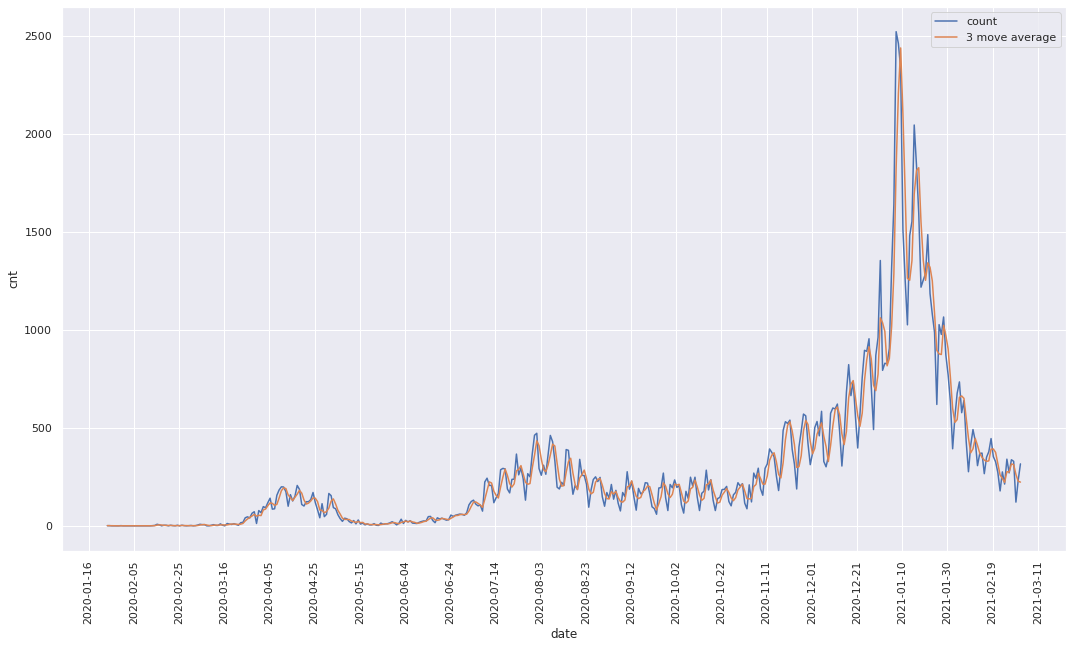

In [92]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='3 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [94]:
y2 = _df['move_ave_7']


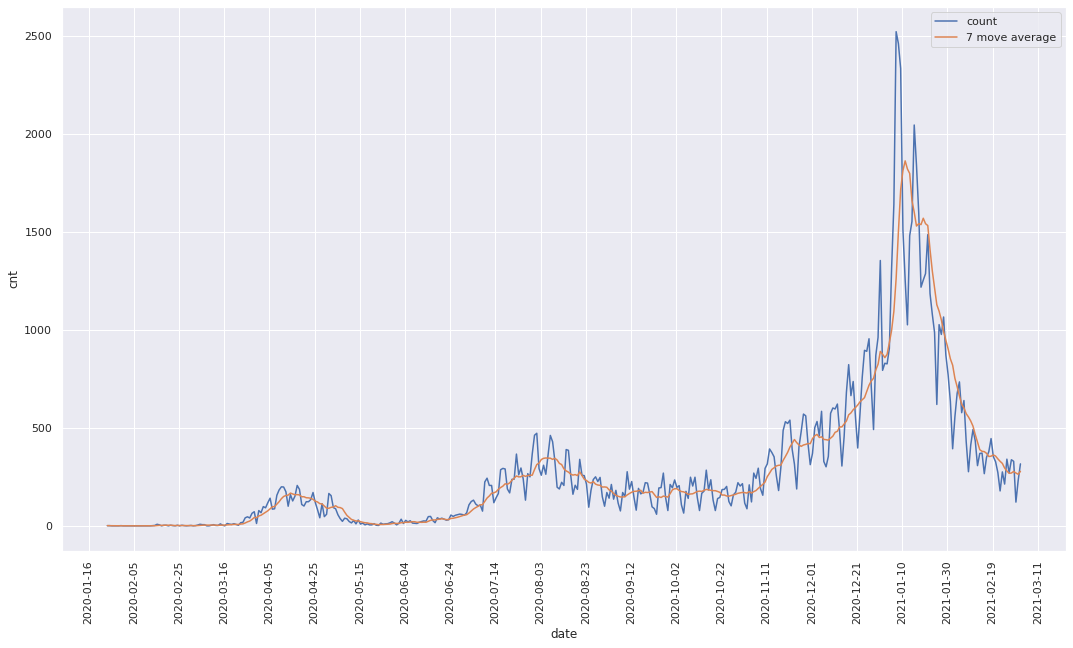

In [95]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='7 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [96]:
y2 = _df['move_ave_14']


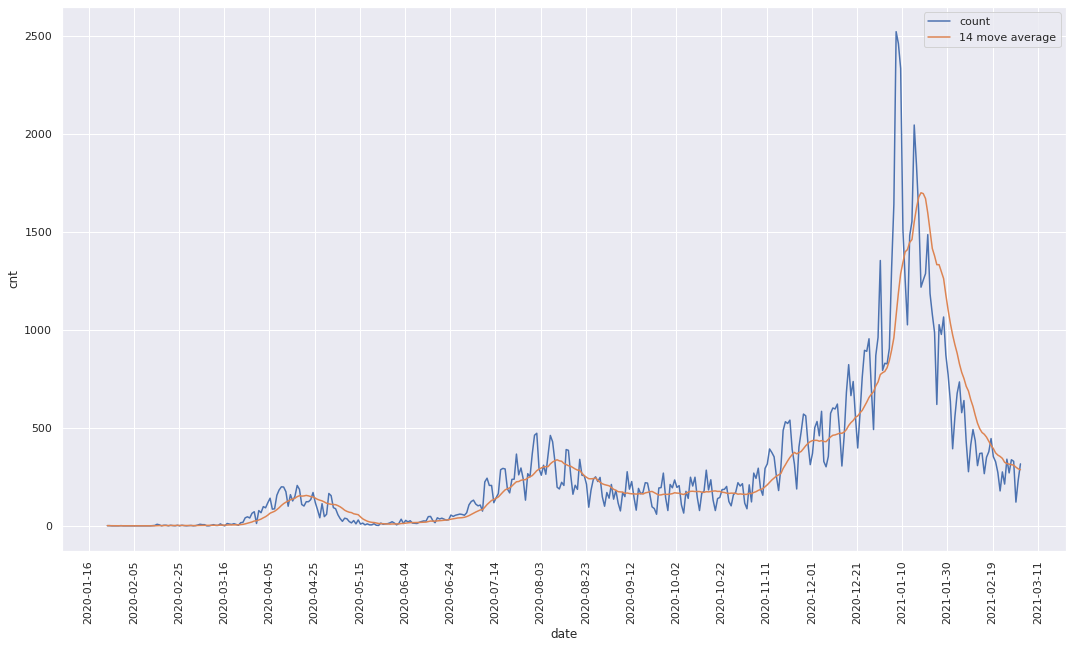

In [97]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='14 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [98]:
y2 = _df['move_ave_21']


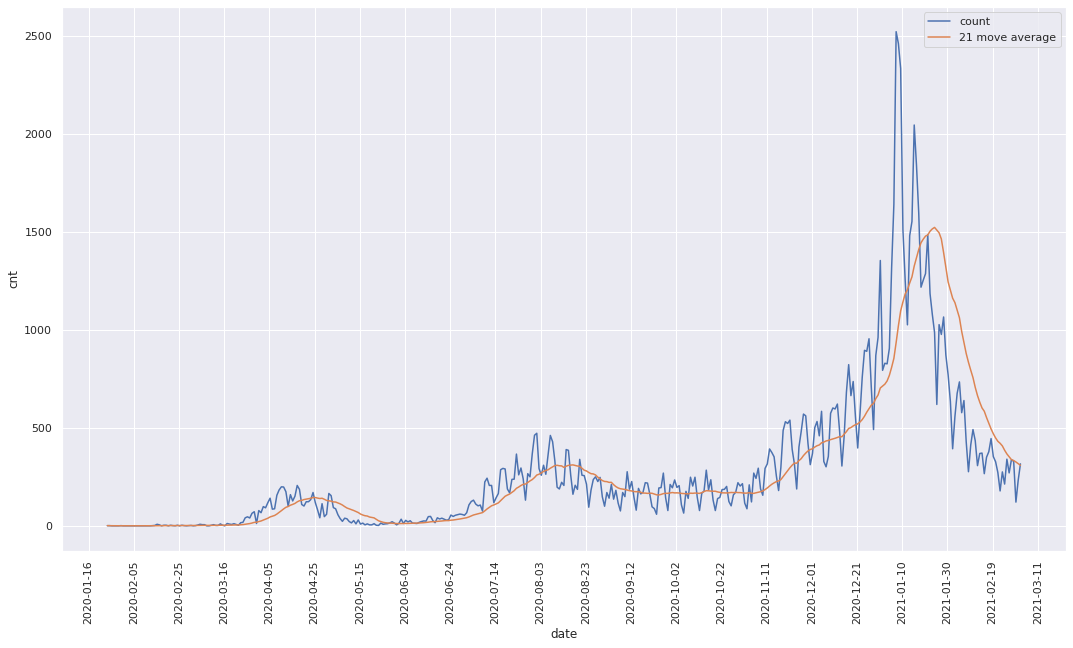

In [99]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='21 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [100]:
y2 = _df['move_ave_30']


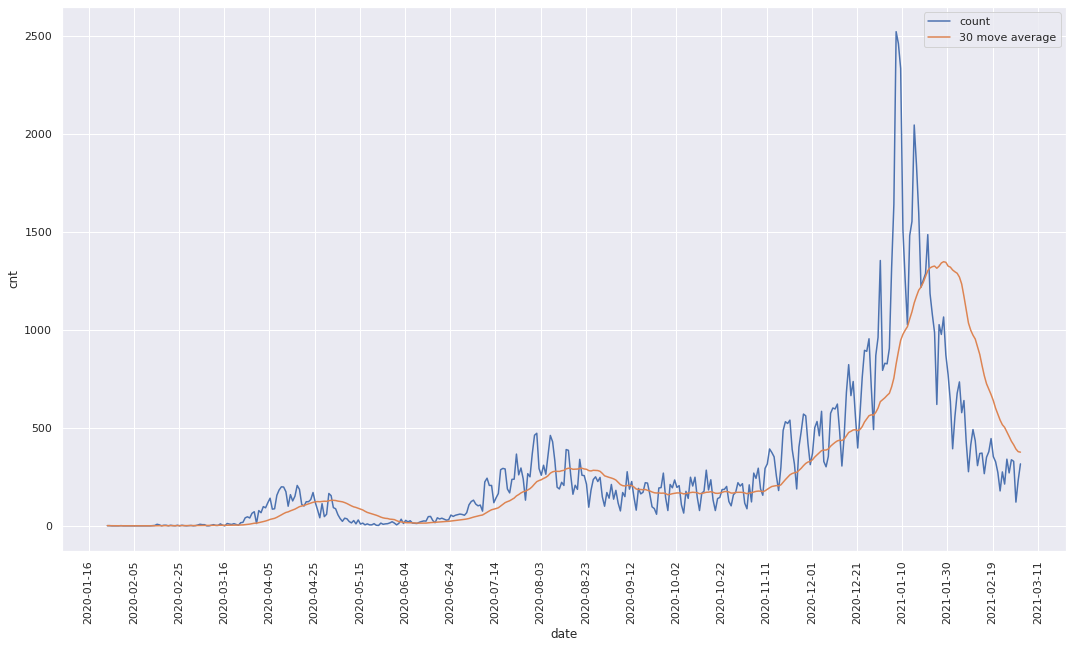

In [101]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='30 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [102]:
y2 = _df['move_ave_60']


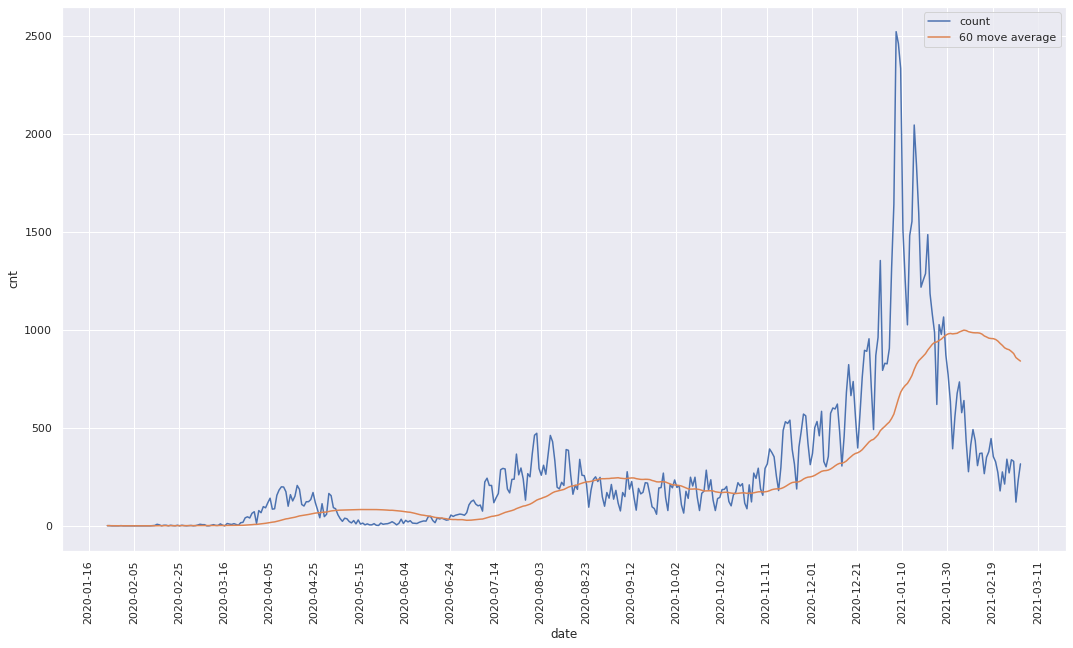

In [103]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='60 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [104]:
y2 = _df['move_ave_90']


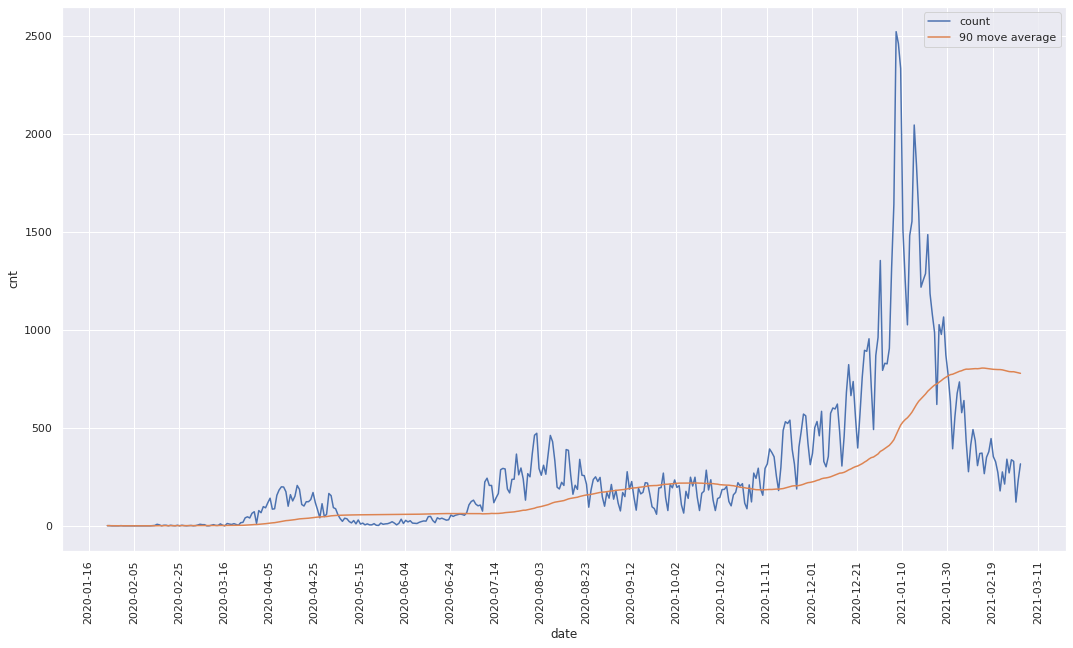

In [105]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='90 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [106]:
y2 = _df['move_ave_120']


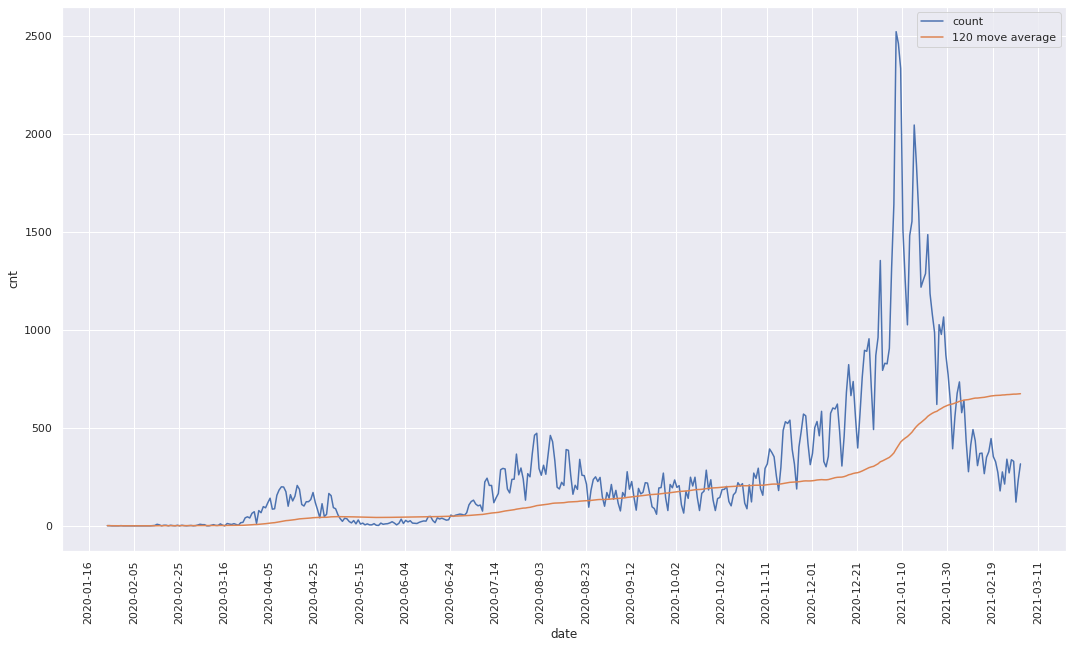

In [107]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='120 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [108]:
y2 = _df['move_ave_180']


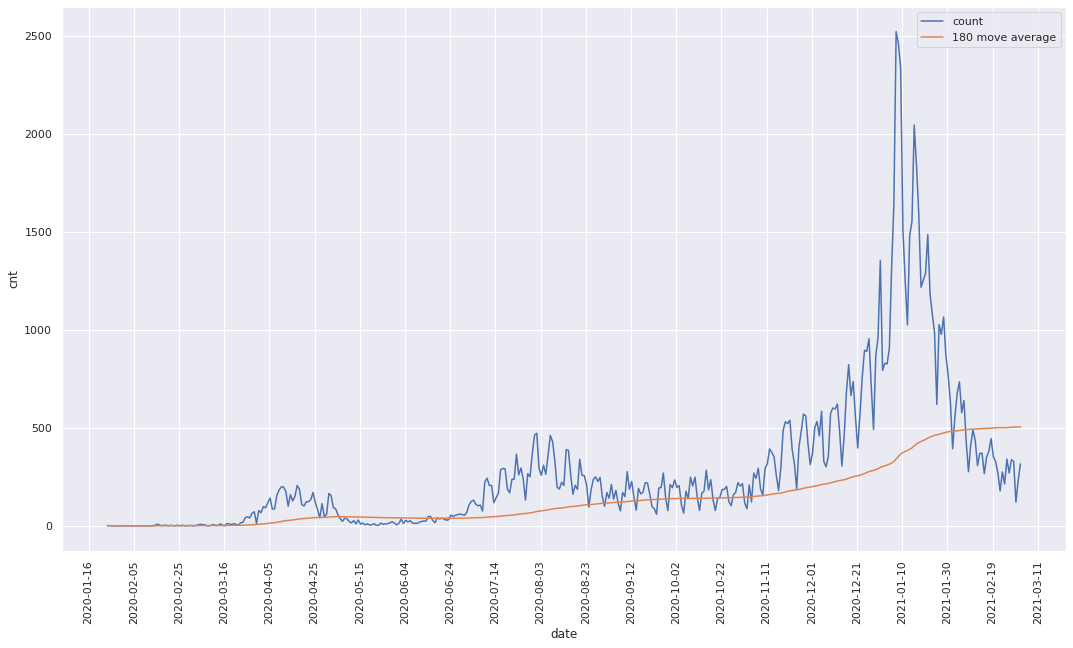

In [109]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='180 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [110]:
y2 = _df['move_ave_365']


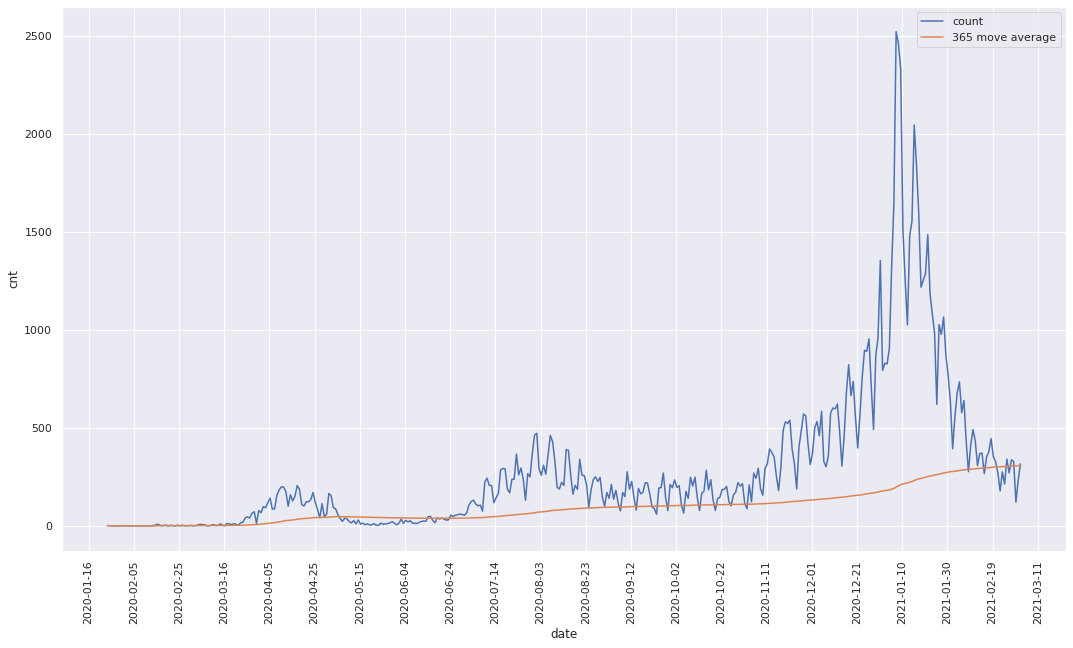

In [111]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='365 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [112]:
y1 = _df['move_ave_3']
y2 = _df['move_ave_7']
y3 = _df['move_ave_14']
y4 = _df['move_ave_21']
y5 = _df['move_ave_30']
y6 = _df['move_ave_60']


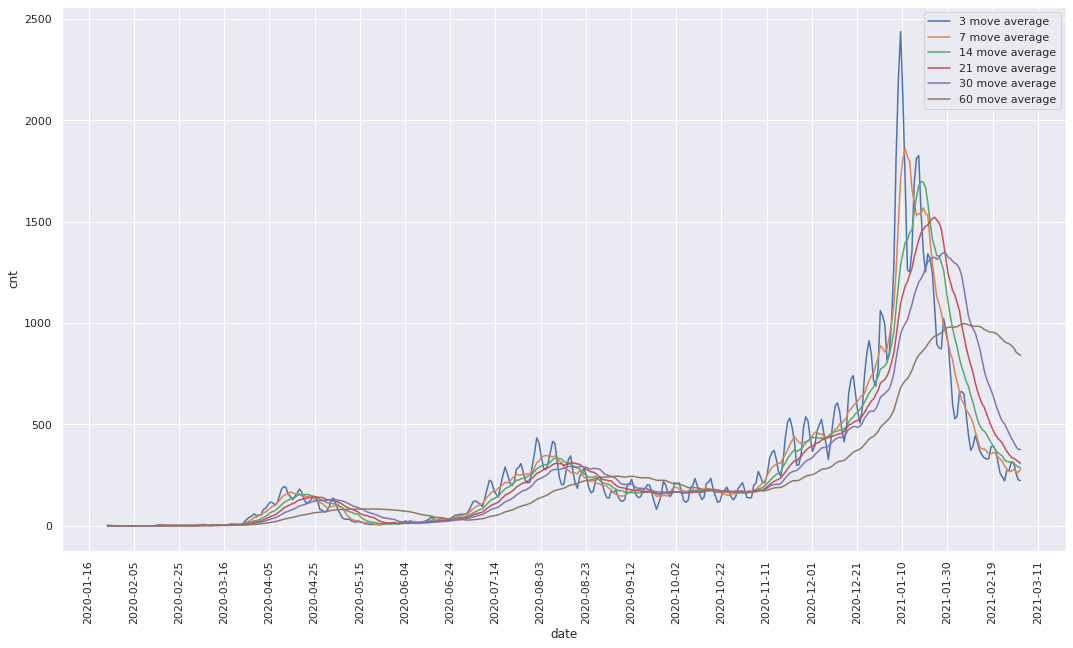

In [113]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='3 move average')
ax.plot(x, y2, label='7 move average')
ax.plot(x, y3, label='14 move average')
ax.plot(x, y4, label='21 move average')
ax.plot(x, y5, label='30 move average')
ax.plot(x, y6, label='60 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [114]:
y5 = _df['move_ave_90']
y6 = _df['move_ave_120']
y7 = _df['move_ave_180']
y8 = _df['move_ave_365']


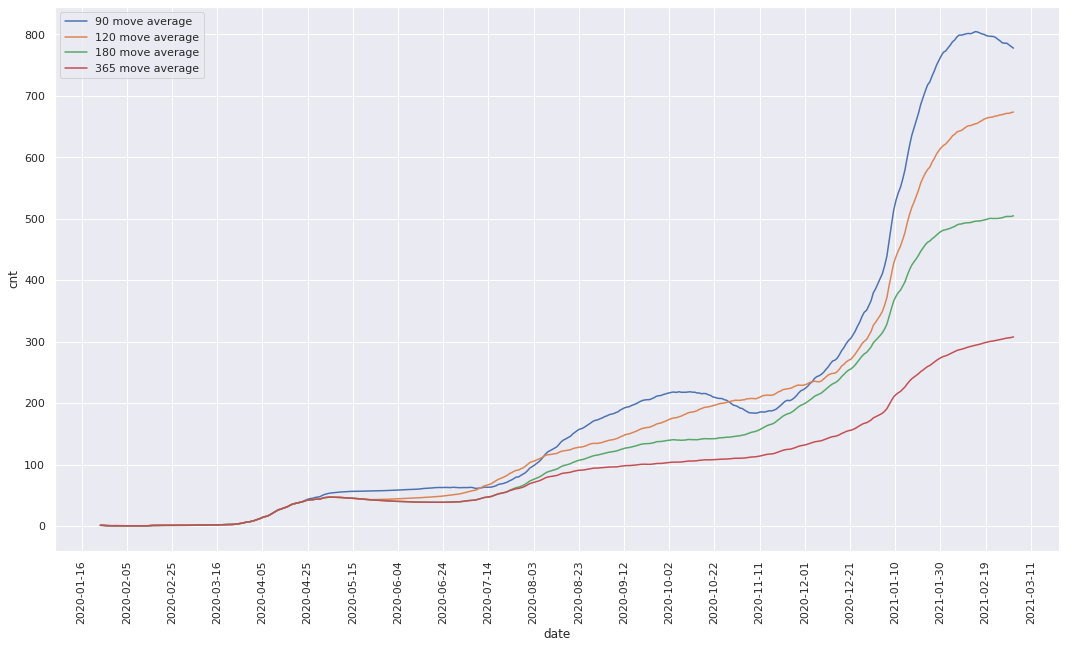

In [115]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y5, label='90 move average')
ax.plot(x, y6, label='120 move average')
ax.plot(x, y7, label='180 move average')
ax.plot(x, y8, label='365 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

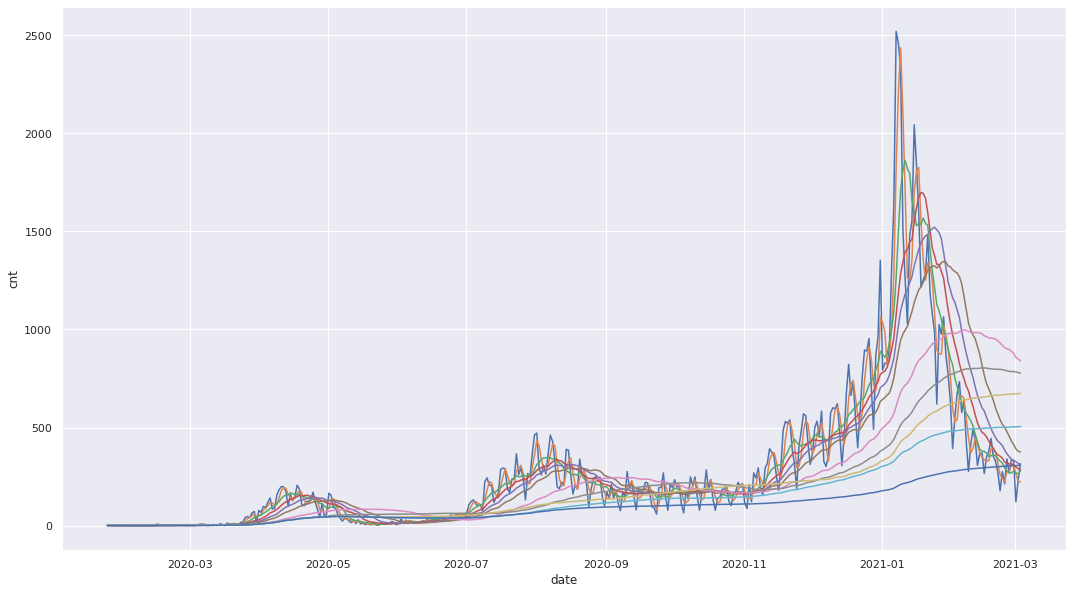

In [116]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18,10))
sns.lineplot(x="date", y="cnt", data=_df)
sns.lineplot(x="date", y="move_ave_3", data=_df)
sns.lineplot(x="date", y="move_ave_7", data=_df)
sns.lineplot(x="date", y="move_ave_14", data=_df)
sns.lineplot(x="date", y="move_ave_21", data=_df)
sns.lineplot(x="date", y="move_ave_30", data=_df)
sns.lineplot(x="date", y="move_ave_60", data=_df)
sns.lineplot(x="date", y="move_ave_90", data=_df)
sns.lineplot(x="date", y="move_ave_120", data=_df)
sns.lineplot(x="date", y="move_ave_180", data=_df)
sns.lineplot(x="date", y="move_ave_365", data=_df)